<a href="https://colab.research.google.com/github/PALLADIUM26/ML/blob/main/ML13_dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

13.	Perform DBSCAN algorithm for weather station clustering. Utilize proper data cleaning and feature selection. Also, plot all outlier of the cluster label.
Dataset: Weather Station dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/weather-stations20140101-20141231.csv')
df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [ ]:
# Drop rows with missing values
# df.dropna(inplace=True)
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Stn_Name  0 non-null      object 
 1   Lat       0 non-null      float64
 2   Long      0 non-null      float64
 3   Prov      0 non-null      object 
 4   Tm        0 non-null      float64
 5   DwTm      0 non-null      float64
 6   D         0 non-null      float64
 7   Tx        0 non-null      float64
 8   DwTx      0 non-null      float64
 9   Tn        0 non-null      float64
 10  DwTn      0 non-null      float64
 11  S         0 non-null      float64
 12  DwS       0 non-null      float64
 13  S%N       0 non-null      float64
 14  P         0 non-null      float64
 15  DwP       0 non-null      float64
 16  P%N       0 non-null      float64
 17  S_G       0 non-null      float64
 18  Pd        0 non-null      float64
 19  BS        0 non-null      float64
 20  DwBS      0 non-null      float64
 21  BS%       

In [ ]:
df.isna().sum()

,0
Stn_Name,0
Lat,0
Long,0
Prov,0
Tm,0
DwTm,0
D,0
Tx,0
DwTx,0
Tn,0


In [ ]:
# features = df[[
#     'Data.Temperature.Avg Temp',
#     'Data.Temperature.Max Temp',
#     'Data.Temperature.Min Temp',
#     'Data.Wind.Speed',
#     'Data.Precipitation'
# ]]
features = df[[
    'Tm',
    'Tx',
    'Tn',
    'P'
]]
features.dropna(inplace=True)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

df = df.loc[features.index]

<ipython-input-25-0fa3f3d605b6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)


In [ ]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1.3, min_samples=5)  # You can tweak eps/min_samples
clusters = dbscan.fit_predict(scaled_features)

In [ ]:
# Add cluster labels to original dataframe
df = df.loc[features.index]  # Keep only rows with complete features
df['Cluster'] = clusters

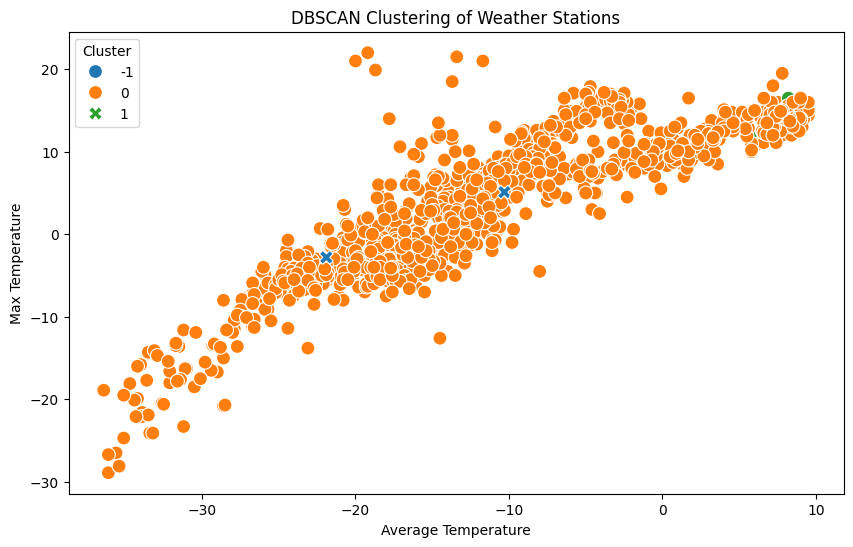

In [ ]:
# Plot Clusters (Using first 2 temp features for visualization)
plt.figure(figsize=(10, 6))

# sns.scatterplot(
#     x=df['Data.Temperature.Avg Temp'],
#     y=df['Data.Temperature.Max Temp'],
#     hue=df['Cluster'],
#     palette='tab10',
#     style=(df['Cluster'] == -1),
#     s=100
# )
sns.scatterplot(
    x=df['Tm'],
    y=df['Tx'],
    hue=df['Cluster'],
    palette='tab10',
    style=(df['Cluster'] == -1),
    s=100
)
plt.title('DBSCAN Clustering of Weather Stations')
plt.xlabel('Average Temperature')
plt.ylabel('Max Temperature')
plt.legend(title='Cluster')
plt.show()


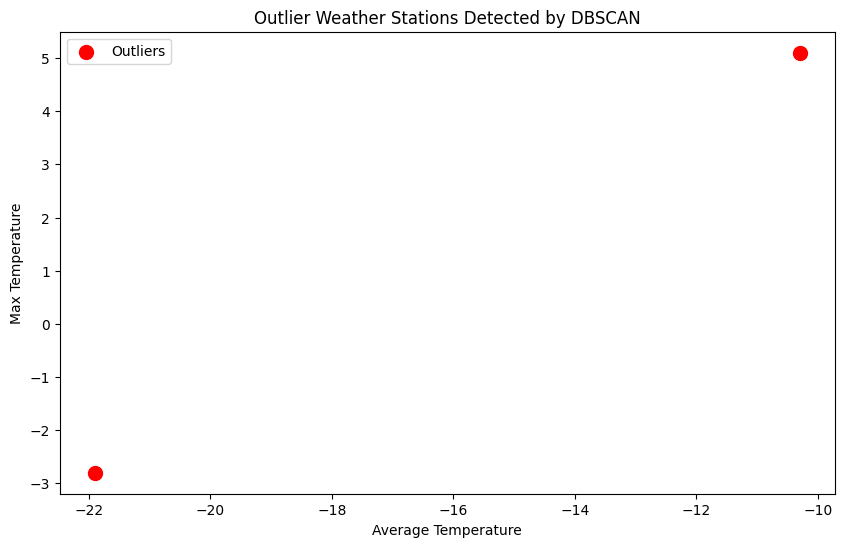

In [ ]:
# Plot Only Outliers
outliers = df[df['Cluster'] == -1]
plt.figure(figsize=(10, 6))
# plt.scatter(
#     outliers['Data.Temperature.Avg Temp'],
#     outliers['Data.Temperature.Max Temp'],
#     c='red',
#     label='Outliers',
#     s=100
# )
plt.scatter(
    outliers['Tm'],
    outliers['Tx'],
    c='red',
    label='Outliers',
    s=100
)
plt.xlabel('Average Temperature')
plt.ylabel('Max Temperature')
plt.title('Outlier Weather Stations Detected by DBSCAN')
plt.legend()
plt.show()
